# MIA (*Ministry of Internal Affairs*) of Ukraine dataset of stolen / lost weapons (including weapon parts)
***

## Main purposes of IDA:
1. Inspect dataset structure.
2. Decide which variables may be useful in further analysis / visualiztion.
3. Proceed with data cleaning and feature engineering.
4. Export data into a suitable format for its further use during EDA.
***

## Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
#pyarrow module is mandatory for parquet export

In [2]:
# Viz
import matplotlib.pyplot as plt

In [3]:
# Pandas display configurations
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None

## Importing dataset

In [4]:
# Flie object
file = 'https://data.gov.ua/dataset/d0af9ba0-08b3-4bca-8508-02cffeaae8fd/resource/1fcab772-0b3c-4938-8f72-e60db343cbe5/download/weaponswanted.json'

In [5]:
# Reading json output into DataFrame
parsed = pd.read_json(file, orient='records')
parsed.head()

,brandmodel,producer,weapontype,weaponkind,weaponseries,weaponnumber,weaponcaliber,trunks,graduationyear,organunit,reasonsearch,insertdate,theftdate
0,НАГАН,ВІТЧИЗНЯНЕ,НАРІЗНА,РЕВОЛЬВЕР,ЛЯ,36,7.62,,,МАНГУШСЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ ЦЕНТРАЛЬНОГО ВІДДІЛУ ГУНП В ДОНЕЦЬКІЙ ОБЛ.,ВИКРАДЕННЯ,1978-03-09T00:00:00,1978-03-09T00:00:00
1,НАГАН,ВІТЧИЗНЯНЕ,НАРІЗНА,РЕВОЛЬВЕР,,31263,7.62,1,,МАКІЇВСЬКЕ МУ ГУМВСУ В ДОНЕЦЬКІЙ ОБЛ.,ВТРАТА,1973-02-14T00:00:00,1973-02-14T00:00:00
2,ТОЗ8М,ВІТЧИЗНЯНЕ,НАРІЗНА,ГВИНТІВКА,,531178,5.6,,,КІРОВСЬКИЙ РВ МАКІЇВСЬКОГО МУ ГУМВСУ В ДОНЕЦЬКІЙ ОБЛ.,ВИКРАДЕННЯ,1969-10-10T00:00:00,1969-10-10T00:00:00
3,ИЖ22,ВІТЧИЗНЯНЕ,ПНЕВМАТИЧНА,ГВИНТІВКА ПНЕВМАТИЧНА,,36774,4.5,,,КАЛІНІНСЬКИЙ РВ ДОНЕЦЬКОГО МУ ГУМВСУ В ДОНЕЦЬКІЙ ОБЛ.,ВИКРАДЕННЯ,1982-01-17T00:00:00,1982-01-17T00:00:00
4,ИЖ22,ВІТЧИЗНЯНЕ,ПНЕВМАТИЧНА,ГВИНТІВКА ПНЕВМАТИЧНА,,40560,4.5,,,КАЛІНІНСЬКИЙ РВ ДОНЕЦЬКОГО МУ ГУМВСУ В ДОНЕЦЬКІЙ ОБЛ.,ВИКРАДЕННЯ,1982-01-17T00:00:00,1982-01-17T00:00:00


## Variables description (assumptions):
- __brandmodel__ -- _item model_**

- __producer__ -- _manufacturer of an item_**

- __weapontype__ -- _rifling or action type of a weapon_**

- __weaponkind__ -- _general description of an item_

- __weaponseries__ -- _weapon series_**

- __weaponnumber__ -- _serial number of a stolen/lost item_**

- __weaponcaliber__ -- _internal diameter of a gun barrel bore_**

- __trunks__ -- _number of barrels_* **

- __graduationyear__ -- _year an item was manufactured in_* **

- __organunit__ -- _(regional) department or institution of the Ministry of Internal Affairs of Ukraine a report was submited to_

- __reasonsearch__ -- _report type: Theft (__ВИКРАДЕННЯ__) or Loss (__ВТРАТА__)_

- __insertdate__ -- _date and time a record first appeared in the database_

- __theftdate__ -- _estimated date and time of a theft/loss_
> \** -- may be not applicable to some items, _e.g. caliber of a sword_
>
> \* -- assumption (since no variables specific explanations were provided)

In [6]:
parsed.info(memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496748 entries, 0 to 496747
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   brandmodel      496748 non-null  object
 1   producer        496748 non-null  object
 2   weapontype      496748 non-null  object
 3   weaponkind      496748 non-null  object
 4   weaponseries    496748 non-null  object
 5   weaponnumber    496748 non-null  object
 6   weaponcaliber   496748 non-null  object
 7   trunks          496748 non-null  object
 8   graduationyear  496748 non-null  object
 9   organunit       496748 non-null  object
 10  reasonsearch    496748 non-null  object
 11  insertdate      496748 non-null  object
 12  theftdate       496748 non-null  object
dtypes: object(13)
memory usage: 546.6 MB


In [7]:
parsed.memory_usage(deep=True)/1000000

Index               0.000128
brandmodel         43.058500
producer           46.727064
weapontype         49.866588
weaponkind         53.856305
weaponseries       31.922169
weaponnumber       31.096776
weaponcaliber      29.482814
trunks             28.774473
graduationyear     29.963927
organunit         105.314619
reasonsearch       47.590608
insertdate         37.752848
theftdate          37.752848
dtype: float64

In [8]:
parsed.describe()

,brandmodel,producer,weapontype,weaponkind,weaponseries,weaponnumber,weaponcaliber,trunks,graduationyear,organunit,reasonsearch,insertdate,theftdate
count,496748,496748,496748,496748,496748,496748,496748,496748,496748,496748,496748,496748,496748
unique,3297,3,13,79,4308,274873,983,24,294,878,2,8053,12326
top,ПМ,ІНОЗЕМНЕ,НАРІЗНА,РУШНИЦЯ МИСЛИВСЬКА,,387,9,1,,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВТРАТА,2022-09-18T00:00:00,2014-05-31T00:00:00
freq,73403,348963,231360,128244,224420,49,178687,381034,84313,122191,384711,17239,99453


In [9]:
parsed.isna().sum()

brandmodel        0
producer          0
weapontype        0
weaponkind        0
weaponseries      0
weaponnumber      0
weaponcaliber     0
trunks            0
graduationyear    0
organunit         0
reasonsearch      0
insertdate        0
theftdate         0
dtype: int64

In [10]:
# Number of empty records in each column
parsed[parsed == ''].count()

brandmodel          1083
producer           56564
weapontype          5687
weaponkind             1
weaponseries      224420
weaponnumber           1
weaponcaliber       4631
trunks             37084
graduationyear     84313
organunit              4
reasonsearch           0
insertdate             0
theftdate              0
dtype: int64

In [11]:
# Percentage of missing values in "weaponseries" column is >40%!
parsed['weaponseries'].value_counts(dropna=False,normalize=True).reset_index().head()

,index,weaponseries
0,,0.451778
1,KO,0.032155
2,BI,0.025560
3,XK,0.016789
4,A,0.012717


In [12]:
# Checking for duplicate records
parsed[parsed.duplicated()].count()[0]

698

In [13]:
# Number of records where "insert" and "theft/loss" dates coincide
parsed[parsed['insertdate'] == parsed['theftdate']].count()[0]

59845

In [14]:
# Records where insertdate is different from theft/loss date
parsed[parsed['insertdate'] != parsed['theftdate']].tail()

,brandmodel,producer,weapontype,weaponkind,weaponseries,weaponnumber,weaponcaliber,trunks,graduationyear,organunit,reasonsearch,insertdate,theftdate
496735,АКС74У,ВІТЧИЗНЯНЕ,НАРІЗНА,АВТОМАТ,,254903,5.45,1,1986,ЦЕНТРАЛЬНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В ДОНЕЦЬКІЙ ОБЛ.,ВТРАТА,2022-10-20T00:00:00,2022-09-28T00:00:00
496736,АКС74У,ВІТЧИЗНЯНЕ,НАРІЗНА,АВТОМАТ,,271684,5.45,1,1988,ЦЕНТРАЛЬНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В ДОНЕЦЬКІЙ ОБЛ.,ВТРАТА,2022-10-20T00:00:00,2022-09-28T00:00:00
496737,АКС74У,ВІТЧИЗНЯНЕ,НАРІЗНА,АВТОМАТ,,273871,5.45,1,1976,ЦЕНТРАЛЬНИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В ДОНЕЦЬКІЙ ОБЛ.,ВТРАТА,2022-10-20T00:00:00,2022-09-28T00:00:00
496746,АК74,,НАРІЗНА,АВТОМАТ,,1692425,"5,45",1,,СУМСЬКИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В СУМСЬКІЙ ОБЛАСТІ,ВТРАТА,2022-10-25T00:00:00,2022-10-24T00:00:00
496747,АК74,,НАРІЗНА,АВТОМАТ,,4429144,"5,45",1,,СУМСЬКИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В СУМСЬКІЙ ОБЛАСТІ,ВТРАТА,2022-10-25T00:00:00,2022-10-24T00:00:00


In [15]:
# Checking frequency of occurences of each value in "trunks" column
# "trunks" column probably contains some information about the number of barrels a weapon had
parsed['trunks'].value_counts() 

1     381034
2      78172
       37084
0        262
3         99
9         25
02        21
01        18
4         10
8          4
5          3
-          2
6          2
7          2
Ё          1
Т          1
Й          1
В          1
12         1
Ї          1
,          1
14         1
23         1
1`         1
Name: trunks, dtype: int64

In [16]:
# Some (supposedly) incorrect entries
parsed[
    (parsed['trunks'] == '9')|
    (parsed['trunks'] == '23')
].head()

,brandmodel,producer,weapontype,weaponkind,weaponseries,weaponnumber,weaponcaliber,trunks,graduationyear,organunit,reasonsearch,insertdate,theftdate
10908,ME9PARA,,ГАЗОВА,ПІСТОЛЕТ ГАЗОВИЙ,,00287,8,9,,ДНІПРОВСЬКЕ УПРАВЛІННЯ ПОЛІЦІЇ ГУНП В М. КИЄВІ,ВТРАТА,2008-10-01T00:00:00,1994-12-28T00:00:00
38913,ИЖ49,ІНОЗЕМНЕ,ГЛАДКОСТВОЛЬНА,РУШНИЦЯ МИСЛИВСЬКА,,1168,12,23,,ЗАРІЧНИЙ ОМ СМВ УМВС СУМСЬКОЇ ОБЛАСТІ,ВТРАТА,2008-02-02T00:00:00,2007-11-10T00:00:00
43150,ИЖ38,ІНОЗЕМНЕ,ПНЕВМАТИЧНА,ГВИНТІВКА ПНЕВМАТИЧНА,Б,15873,4.5,9,1986,КИЇВСЬКИЙ ВІДДІЛ ПОЛІЦІЇ В МІСТІ ОДЕСІ ГУНП В ОДЕСЬКІЙ ОБЛАСТІ,ВИКРАДЕННЯ,2009-02-09T00:00:00,1988-05-06T00:00:00
55728,ПМ,ІНОЗЕМНЕ,НАРІЗНА,ПІСТОЛЕТ,BБ,2161,9,9,1963,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В ІВАНО-ФРАНКІВСЬКІЙ ОБЛАСТІ,ВИКРАДЕННЯ,2014-03-29T00:00:00,2014-02-19T00:00:00
61893,МКМ072СБ,ВІТЧИЗНЯНЕ,НАРІЗНА,КАРАБІН,KI/M,03814,"7,62",9,,ВОРОШИЛОВСЬКИЙ РВ ДОНЕЦЬКОГО МУ ГУМВСУ В ДОНЕЦЬКІЙ ОБЛ.,ВИКРАДЕННЯ,2014-05-04T00:00:00,2014-05-04T00:00:00


***
## Pre DataFrame

Several columns (_"producer"_, _"weaponeries"_, _"weaponcaliber"_, _"trunks"_, _"graduationyear"_, _"brandmodel"_) do not provide any information needed in further analysis.

In [17]:
# Choosing columns for the new DataFrame
pre_df = parsed.loc[:,['weaponnumber', 'weaponkind', 'organunit', 'reasonsearch', 'insertdate', 'theftdate']].copy()
pre_df.head()

,weaponnumber,weaponkind,organunit,reasonsearch,insertdate,theftdate
0,36,РЕВОЛЬВЕР,МАНГУШСЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ ЦЕНТРАЛЬНОГО ВІДДІЛУ ГУНП В ДОНЕЦЬКІЙ ОБЛ.,ВИКРАДЕННЯ,1978-03-09T00:00:00,1978-03-09T00:00:00
1,31263,РЕВОЛЬВЕР,МАКІЇВСЬКЕ МУ ГУМВСУ В ДОНЕЦЬКІЙ ОБЛ.,ВТРАТА,1973-02-14T00:00:00,1973-02-14T00:00:00
2,531178,ГВИНТІВКА,КІРОВСЬКИЙ РВ МАКІЇВСЬКОГО МУ ГУМВСУ В ДОНЕЦЬКІЙ ОБЛ.,ВИКРАДЕННЯ,1969-10-10T00:00:00,1969-10-10T00:00:00
3,36774,ГВИНТІВКА ПНЕВМАТИЧНА,КАЛІНІНСЬКИЙ РВ ДОНЕЦЬКОГО МУ ГУМВСУ В ДОНЕЦЬКІЙ ОБЛ.,ВИКРАДЕННЯ,1982-01-17T00:00:00,1982-01-17T00:00:00
4,40560,ГВИНТІВКА ПНЕВМАТИЧНА,КАЛІНІНСЬКИЙ РВ ДОНЕЦЬКОГО МУ ГУМВСУ В ДОНЕЦЬКІЙ ОБЛ.,ВИКРАДЕННЯ,1982-01-17T00:00:00,1982-01-17T00:00:00


In [18]:
# Removing duplicates
pre_df.drop_duplicates(inplace=True)

In [19]:
# Reducing DataFrame size by converting variables to lighter and more flexible data types
for c in pre_df.columns:
    if c in ['insertdate', 'theftdate']:
        pre_df[c] = pd.to_datetime(pre_df[c], utc=True, format='%Y-%m-%d', errors = 'coerce').dt.date
        pre_df[c] = pre_df[c].astype('datetime64')
    else:
        pre_df[c] = pre_df[c].astype('category')

pre_df.info(memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487931 entries, 0 to 496747
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   weaponnumber  487931 non-null  category      
 1   weaponkind    487931 non-null  category      
 2   organunit     487931 non-null  category      
 3   reasonsearch  487931 non-null  category      
 4   insertdate    487931 non-null  datetime64[ns]
 5   theftdate     487331 non-null  datetime64[ns]
dtypes: category(4), datetime64[ns](2)
memory usage: 40.0 MB


***
## Data Cleaning & Feature Engineering

In [20]:
df = pre_df.copy()

In [21]:
df.describe(datetime_is_numeric=True)

,insertdate,theftdate
count,487931,487331
mean,2017-10-24 19:53:08.272932352,2016-03-20 06:10:38.828229376
min,1920-12-31 00:00:00,1919-02-15 00:00:00
25%,2017-03-15 00:00:00,2014-05-31 00:00:00
50%,2018-02-14 00:00:00,2017-02-21 00:00:00
75%,2020-07-03 00:00:00,2020-06-17 00:00:00
max,2022-11-29 00:00:00,2022-11-28 00:00:00


***
### reasonsearch

In [22]:
# Counting number of occurences of values in the "reasonsearch" column
df['reasonsearch'].value_counts()

ВТРАТА        380842
ВИКРАДЕННЯ    107089
Name: reasonsearch, dtype: int64

In some cases converting values of dichotomous variables into 0s and 1s would be a correct
approach. However, in this case it is easier to leave format as it is. Mainly because it is more intuitive to interpret 1 and 0 as lost and found, or stolen and returned, rather than stolen and lost.

In [23]:
# Changing words case from "uppercase" to "title case"
df['reasonsearch'] = df['reasonsearch'].str.title()

In [24]:
df.head(1)

,weaponnumber,weaponkind,organunit,reasonsearch,insertdate,theftdate
0,36,РЕВОЛЬВЕР,МАНГУШСЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ ЦЕНТРАЛЬНОГО ВІДДІЛУ ГУНП В ДОНЕЦЬКІЙ ОБЛ.,Викрадення,1978-03-09,1978-03-09


In [25]:
# Optional (translating values into English)
df['reasonsearch'].replace('Викрадення','Theft',inplace=True)
df['reasonsearch'].replace('Втрата','Loss',inplace=True)

In [26]:
# Casting values to category data type
df['reasonsearch'] = df['reasonsearch'].astype('category')
df['reasonsearch'].dtype

CategoricalDtype(categories=['Loss', 'Theft'], ordered=False)

In [27]:
# Renaming reasonserach to "report"
df.rename(columns={'reasonsearch':'report'}, inplace=True)

***
### organunit

In [28]:
# Looking through number of occurences of values in the "reasonsearch" column
df['organunit'].value_counts()

ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ                                                                     119491
ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В ДОНЕЦЬКІЙ ОБЛАСТІ.                                                                                                68785
ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В ЗАПОРІЗЬКІЙ ОБЛАСТІ                                                                                               18882
ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В ЛУГАНСЬКІЙ ОБЛАСТІ                                                                                                16864
ОХТИРСЬКИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В СУМСЬКІЙ ОБЛАСТІ                                                                                                            7134
БІЛОКУРАКИНСЬКИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В ЛУГАНСЬКІЙ ОБЛАСТІ                                                                                                    5777
СТАРОБІЛЬСЬКИЙ ВІДДІЛ ПОЛІЦІ

In [29]:
# Checking records with missing "organunit" values
df[df['organunit']=='']

,weaponnumber,weaponkind,organunit,report,insertdate,theftdate
13990,,ПІСТОЛЕТ ГАЗОВИЙ,,Loss,2009-08-17,2009-08-14
15077,XA00302,РЕВОЛЬВЕР ПІД ГУМОВУ КУЛЮ,,Theft,2010-03-18,NaT
16502,154837,РУШНИЦЯ МИСЛИВСЬКА,,Loss,2011-01-17,NaT
32162,01344,ПІСТОЛЕТ ГАЗОВИЙ,,Theft,2010-09-18,NaT


In [30]:
# Removing records with "organunit" values missing
df.drop(index=df[df['organunit']==''].index, inplace=True)
df[df['organunit']=='']

,weaponnumber,weaponkind,organunit,report,insertdate,theftdate


The _"organunit"_ values add a lot of unnecessary complexity, so it would be more straightforward to stick to the administrative centers' names only.

### (NEW) region

In [31]:
df['organunit'].head(1)[0]

'МАНГУШСЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ ЦЕНТРАЛЬНОГО ВІДДІЛУ ГУНП В ДОНЕЦЬКІЙ ОБЛ.'

In [32]:
# Casting "organunit" to str and storing the output in the temporary variable
tmp_region = df['organunit'].astype(str)

In [33]:
# Creating dictionary with oblasts names (keys) and their respective regular expressions (values)
regx_oblasts = {
    'Uzhhorod': r'(?i)\bЗАКАРПАТ\w{0,6}.{1,5}\bобл',
    'Lviv': r'(?i)\bЛЬВ[іо]ВС\w{0,1}К\w{0,6}.{1,5}\bобл',
    'Ivano-Frankivsk': r'(?i)\b[іи]В\w{0,3}[.\-]ФР\w{0,10}.{1,5}\bобл',
    'Chernivtsi': r'(?i)\bЧЕРН[іо]В\w{0,1}Ц\w{0,6}.{1,5}\bобл',
    'Ternopil': r'(?i)\bТЕРНОП[іо]ЛЬС\w{0,6}.{1,5}\bобл',
    'Lutsk': r'(?i)\bВОЛ\w{1,2}Н\w{0,6}.{1,5}\bобл',
    'Rivne': r'(?i)\bР[іо]ВНЕНС\w{0,6}.{1,5}\bобл',
    'Zhytomyr': r'(?i)\bЖИТОМИРС\w{0,6}.{1,5}\bобл',
    'Khmelnytskyi': r'(?i)\bХМЕЛЬНИЦ\w{0,6}.{1,5}\bобл',
    'Vinnytsia': r'(?i)\bВ[іи]ННИЦ\w{0,6}.{1,5}\bобл',
    'Kyiv': r'(?i)\bКИ[їе]В\w{0,6}.{1,5}\bобл',
    'Cherkasy': r'(?i)\bЧЕРКАC\w{0,6}.{1,5}\bобл',
    'Kropyvnytskyi': r'(?i)\bК[іи]РОВОГРАДС\w{0,6}.{1,5}\bобл',
    'Odesa': r'(?i)\bОДЕС\w{0,6}.{1,5}\bобл',
    'Mykolaiv': r'(?i)\b[мн]ИКОЛА[їеє]ВС\w{0,6}.{1,5}\bобл',
    'Kherson': r'(?i)\bХЕРСОНС\w{0,6}.{1,5}\bобл',
    'Simferopol': r'(?i)\bКР\w{1,2}М\b|\bСЕВАСТ\w{0,1}ПОЛ\w{1,10}\b|\bЯЛТ\w{1,10}|\bАР\b|\bС[іи]МФЕРОПОЛ\w{1,10}\b',
    'Zaporizhzhia': r'(?i)\bЗАПОР[іо]\w{0,6}.{1,5}\bобл',
    'Dnipro': r'(?i)\bДН[іе]ПРОПЕТРОВС\w{0,6}.{1,5}\bобл',
    'Poltava': r'(?i)\bПОЛТАВС\w{0,6}.{1,5}\bобл',
    'Chernihiv': r'(?i)\bЧЕРН[іи]Г[іо]В\w{0,6}.{1,5}\bобл',
    'Sumy': r'(?i)\bСУМ\w{0,6}.{1,5}\bобл',
    'Kharkiv': r'(?i)\bХАР\w{0,1}К[іо]В\w{0,6}.{1,5}\bобл',
    'Luhansk': r'(?i)\bЛУГАНС\w{0,6}.{1,5}\bобл',
    'Donetsk': r'(?i)\bДОНЕЦ\w{0,6}.{1,5}\bобл'
}

In [34]:
# Creating dictionary with administrative centers' names (keys) and their respective regular expressions (values)
regx_acenters = {
    'Uzhhorod': r'(?i)\bУЖГОРОД\w{0,6}\b',
    'Lviv': r'(?i)\bЛЬВ[іо]В\w{0,6}\b',
    'Ivano-Frankivsk': r'(?i)\b[іи]В\w{0,3}[.\-]ФРАНК\w{0,3}ВС\w{0,6}\b',
    'Chernivtsi': r'(?i)\bЧЕРН[іо]В\w{0,1}Ц\w{0,6}\b',
    'Ternopil': r'(?i)\bТЕРНОП[іо]ЛЬ\w{0,6}\b',
    'Lutsk': r'(?i)\bВОЛ\w{1,2}Н\w{0,6}\b|\bЛУЦ\w{0,1}К\w{0,6}\b',
    'Rivne': r'(?i)\bР[іо]ВН[ео]\w{0,6}\b|\bГОЩАНС\w{0,5}\b',
    'Zhytomyr': r'(?i)\bЖИТОМИР\w{0,6}\b',
    'Khmelnytskyi': r'(?i)\bХМЕЛЬНИЦ\w{0,6}\b',
    'Vinnytsia': r'(?i)\bВ[іи]ННИЦ\w{0,6}\b',
    'Kyiv': r'(?i)\bКИ[їеє]В\w{0,6}\b|\bПЕЧЕРСЬК\w{0,6}\b|\bГОЛОСІЇВ\w{0,6}\b',
    'Cherkasy': r'(?i)\bЧЕРКАС\w{0,6}\b',
    'Kropyvnytskyi': r'(?i)\bК[іи]РОВОГРАД\w{0,6}\b|\bКРОПИВНИЦ\w{0,6}\b',
    'Odesa': r'(?i)\bОДЕС\w{0,6}\b',
    'Mykolaiv': r'(?i)\b[мн]ИКОЛА[їеє]В\w{0,6}\b',
    'Kherson': r'(?i)\bХЕРСОН\w{0,6}\b',
    'Simferopol': r'(?i)\bКР\w{1,2}М\b|\bСЕВАСТ\w{0,1}ПОЛ\w{1,10}\b|\bЯЛТ\w{1,10}|\bАР\b|\bС[іи]МФЕРОПОЛ\w{1,10}\b',
    'Zaporizhzhia': r'(?i)\bЗАПОР[іо]\w{0,6}\b',
    'Dnipro': r'(?i)\bДН[іе]ПР\w{0,10}\b|\bДН[іе]ПРОПЕТРОВС\w{0,6}\b|\bКРИВ\w{0,3}\W{0,5}Р\w{1,6}\b',
    'Poltava': r'(?i)\bПОЛТАВ\w{0,6}\b',
    'Chernihiv': r'(?i)\bЧЕРН[іи]Г[іо]В\w{0,6}\b|\bН[іе]ЖИН\w{0,6}\b|\bБАХМА\w{0,6}\b',
    'Sumy': r'(?i)\bСУМ\w{0,6}\b|\bЛЮБОТ\w{1,6}\b',
    'Kharkiv': r'(?i)\bХАР\w{0,1}К[іо]В\w{0,6}\b|\bЛОЗОВ\w{0,6}\b|\bОСНОВ\w{0,6}\b',
    'Luhansk': r'(?i)\bЛУГАНС\w{0,6}\b',
    'Donetsk': r'(?i)\bДОНЕЦ\w{0,6}\b'
}

In [35]:
tmp_region[tmp_region.str.contains(regx_oblasts['Chernivtsi'])].head()

5959       САДГІРСЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ ЧЕРНІВЕЦЬКОГО ВІДДІЛУ ГУНП В ЧЕРНІВЕЦЬКІЙ ОБЛАСТІ
5960    ШЕВЧЕНКІВСЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ ЧЕРНІВЕЦЬКОГО ВІДДІЛУ ГУНП В ЧЕРНІВЕЦЬКІЙ ОБЛАСТІ
5961                             СТОРОЖИНЕЦЬКИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В ЧЕРНІВЕЦЬКІЙ ОБЛАСТІ
5962                                КІЦМАНСЬКИЙ ВІДДІЛ ПОЛІЦІЇ ГУНП В ЧЕРНІВЕЦЬКІЙ ОБЛАСТІ
5986         ВИЖНИЦЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ КІЦМАНСЬКОГО ВІДДІЛУ ГУНП В ЧЕРНІВЕЦЬКІЙ ОБЛАСТІ
Name: organunit, dtype: object

In [36]:
# 1st Searching for oblasts in "tmp_region" and replacing them with their respective region names from "regx_oblasts"
for k,v in regx_oblasts.items(): 
    tmp_region[tmp_region.str.contains(regx_oblasts[k])]= str(k)

# 2nd Searching for cities, districts, towns, etc., in "tmp_region" and replacing them with their respective region names from "regx_acenters"
for k,v in regx_acenters.items(): 
    tmp_region[tmp_region.str.contains(regx_acenters[k])]= str(k)

In [37]:
 tmp_region.rename('region', inplace=True).name

'region'

In [38]:
# Shape before join
df.shape, tmp_region.shape

((487927, 6), (487927,))

In [39]:
# Joining "region" column to the original dataframe
df = df.join( 
    tmp_region, 
    how='left') # joins on index by default
df.head(1)

,weaponnumber,weaponkind,organunit,report,insertdate,theftdate,region
0,36,РЕВОЛЬВЕР,МАНГУШСЬКЕ ВІДДІЛЕННЯ ПОЛІЦІЇ ЦЕНТРАЛЬНОГО ВІДДІЛУ ГУНП В ДОНЕЦЬКІЙ ОБЛ.,Theft,1978-03-09,1978-03-09,Donetsk


In [40]:
# Shape after join
df.shape

(487927, 7)

In [41]:
# Checking whether all values were replaced
df['region'].value_counts()

Simferopol                                                      122678
Donetsk                                                          91726
Luhansk                                                          58880
Kyiv                                                             55197
Zaporizhzhia                                                     27607
Kharkiv                                                          19405
Odesa                                                            15355
Sumy                                                             12444
Dnipro                                                           12179
Kherson                                                           8572
Chernihiv                                                         7439
Mykolaiv                                                          7112
Poltava                                                           6563
Lviv                                                              6041
Vinnyt

In [42]:
# Percentage of each of the values in the dataframe
df['region'].value_counts(dropna=False,normalize=True)

Simferopol                                                      0.251427
Donetsk                                                         0.187991
Luhansk                                                         0.120674
Kyiv                                                            0.113126
Zaporizhzhia                                                    0.056580
Kharkiv                                                         0.039770
Odesa                                                           0.031470
Sumy                                                            0.025504
Dnipro                                                          0.024961
Kherson                                                         0.017568
Chernihiv                                                       0.015246
Mykolaiv                                                        0.014576
Poltava                                                         0.013451
Lviv                                               

In [43]:
# Some ambiguous values ("НАЦІОНАЛЬНА ПОЛІЦІЯ УКРАЇНИ", "6227", etc.) make up a total of ~0.1% of all values,
#therefore can be ommited
df = df[df['region'].isin(regx_acenters.keys())]
df['region'].value_counts()

Simferopol         122678
Donetsk             91726
Luhansk             58880
Kyiv                55197
Zaporizhzhia        27607
Kharkiv             19405
Odesa               15355
Sumy                12444
Dnipro              12179
Kherson              8572
Chernihiv            7439
Mykolaiv             7112
Poltava              6563
Lviv                 6041
Vinnytsia            5516
Lutsk                5222
Zhytomyr             4050
Ivano-Frankivsk      3832
Cherkasy             3613
Ternopil             3479
Uzhhorod             2919
Kropyvnytskyi        2822
Rivne                2126
Khmelnytskyi         1633
Chernivtsi           1049
Name: region, dtype: int64

In [44]:
df.info(memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487459 entries, 0 to 496747
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   weaponnumber  487459 non-null  category      
 1   weaponkind    487459 non-null  category      
 2   organunit     487459 non-null  category      
 3   report        487459 non-null  category      
 4   insertdate    487459 non-null  datetime64[ns]
 5   theftdate     486862 non-null  datetime64[ns]
 6   region        487459 non-null  object        
dtypes: category(4), datetime64[ns](2), object(1)
memory usage: 70.0 MB


In [45]:
# Removing "organunit" column
df.drop(columns=['organunit'], inplace=True)

In [46]:
# Casting values to category data type
df['region'] = df['region'].astype('category')

***
### weaponkind

In [47]:
# Checking number of unique values in "weaponkind" column
df['weaponkind'].value_counts()

РУШНИЦЯ МИСЛИВСЬКА                  127061
АВТОМАТ                             101093
ПІСТОЛЕТ                             76955
ПІСТОЛЕТ ГАЗОВИЙ                     47352
ПІСТОЛЕТ ПІД ГУМОВУ КУЛЮ             44797
КАРАБІН                              32429
РЕВОЛЬВЕР ГАЗОВИЙ                    15244
КУЛЕМЕТ                               7978
ГРАНАТОМЕТ                            6971
РЕВОЛЬВЕР ПІД ГУМОВУ КУЛЮ             5253
ГВИНТІВКА                             3701
ПІСТОЛЕТ СИГНАЛЬНИЙ                   2489
РЕВОЛЬВЕР                             1646
НІЖ МИСЛИВСЬКИЙ                       1367
ШТИК НІЖ                              1330
КОРТИК                                1255
ГВИНТІВКА ПНЕВМАТИЧНА                 1250
АВТОМАТ УЧБОВИЙ                       1244
РАКЕТНИЦЯ                             1090
ПІСТОЛЕТ ПНЕВМАТИЧНИЙ                  994
ГВИНТІВКА МК                           975
НІЖ                                    848
ПІСТОЛЕТ КУЛЕМЕТ                       471
ІНШІ ДЕТАЛІ

In [48]:
# Checking empty records in "weaponkind"
df[df['weaponkind']=='']

,weaponnumber,weaponkind,report,insertdate,theftdate,region
117664,14960,,Loss,2016-10-13,2016-10-07,Kyiv


In [49]:
# Removing record with missing "weaponkind" value
df.drop(index=df[df['weaponkind']==''].index, inplace=True)
df[df['weaponkind']=='']

,weaponnumber,weaponkind,report,insertdate,theftdate,region


In [50]:
# Casting values to category data type
df['weaponkind'] = df['weaponkind'].astype('category')

### (NEW) weaponcategory

All the weapons from the **weaponkind** variable can be broken down into several categories, facilitating further analysis.

In [51]:
# Looking through unique values of a "weaponkind" variable
set(df['weaponkind'])

{'ІНШІ ДЕТАЛІ ЗБРОЇ',
 'АВТОМАТ',
 'АВТОМАТ УЧБОВИЙ',
 'АРБАЛЕТ',
 'ВИБУХОВІ РЕЧОВИНИ',
 'ГАРМАТА',
 'ГАРМАТА АВТОМАТИЧНА',
 'ГВИНТІВКА',
 'ГВИНТІВКА МК',
 'ГВИНТІВКА ПНЕВМАТИЧНА',
 'ГВИНТІВКА УЧБОВА',
 'ГРАНАТА',
 'ГРАНАТОМЕТ',
 'ДЕТАЛІ',
 'ЗАПАЛ',
 'ЗАТВОР ДЕТАЛЬ',
 'ЗЕНІТНА УСТАНОВКА',
 'КАРАБІН',
 'КАРАБІН ПІД ПАТРОН ФЛОБЕРА',
 'КАРАБІН УЧБОВИЙ',
 'КИНДЖАЛ',
 'КИСТЕНЬ',
 'КОРТИК',
 'КУЛЕМЕТ',
 'КУЛЕМЕТ СТАНКОВИЙ',
 'КУЛЕМЕТ УЧБОВИЙ',
 'МІНОМЕТ',
 'МАГАЗИН',
 'МАГАЗИН ПІСТОЛЕТНИЙ',
 'МЕЧ',
 'НІЖ',
 'НІЖ МИСЛИВСЬКИЙ',
 'НАБОЇ БОЄВІ',
 'ОБРІЗ ГВИНТІВКИ',
 'ОБРІЗ ГВИНТІВКИ МК',
 'ОБРІЗ КАРАБІНА',
 'ОБРІЗ РУШНИЦІ',
 'ПІСТОЛЕТ',
 'ПІСТОЛЕТ АВТОРУЧКА',
 'ПІСТОЛЕТ ГАЗОВИЙ',
 'ПІСТОЛЕТ КУЛЕМЕТ',
 'ПІСТОЛЕТ МК',
 'ПІСТОЛЕТ МОНТАЖНИЙ',
 'ПІСТОЛЕТ ПІД ГУМОВУ КУЛЮ',
 'ПІСТОЛЕТ ПІД ПАТРОН ФЛОБЕРА',
 'ПІСТОЛЕТ ПНЕВМАТИЧНИЙ',
 'ПІСТОЛЕТ САМОРОБНИЙ',
 'ПІСТОЛЕТ СИГНАЛЬНИЙ',
 'ПІСТОЛЕТ СТАРТОВИЙ',
 'ПІСТОЛЕТ УЧБОВИЙ',
 'ПЗРК',
 'ПРИЦІЛ ОПТИЧНИЙ',
 'ПТРК',
 'ПУСКОВІ УСТАНОВКИ',
 'РАКЕТА',
 'РАКЕТНИЦЯ

In [52]:
# Temporary Series objects below will be later used to populate DataFrame 
bladed = pd.Series([
    'КИНДЖАЛ',
    'КОРТИК',
    'МЕЧ',
    'НІЖ МИСЛИВСЬКИЙ',
    'НІЖ',
    'ШАБЛЯ',
    'ШАШКА',
    'ШТИК НІЖ',
    'ШТИК'
])
handguns = pd.Series([
    'ПІСТОЛЕТ ГАЗОВИЙ', 
    'ПІСТОЛЕТ КУЛЕМЕТ',
    'ПІСТОЛЕТ МК',
    'ПІСТОЛЕТ ПІД ГУМОВУ КУЛЮ',
    'ПІСТОЛЕТ САМОРОБНИЙ',
    'ПІСТОЛЕТ СИГНАЛЬНИЙ',
    'ПІСТОЛЕТ СТАРТОВИЙ',
    'ПІСТОЛЕТ',
    'РЕВОЛЬВЕР ГАЗОВИЙ',
    'РЕВОЛЬВЕР ГАЗОВОДРОБОВИЙ',
    'РЕВОЛЬВЕР ПІД ГУМОВУ КУЛЮ',
    'РЕВОЛЬВЕР СИГНАЛЬНИЙ',
    'РЕВОЛЬВЕР СТАРТОВИЙ',
    'РЕВОЛЬВЕР',
    'ПІСТОЛЕТ АВТОРУЧКА'
])
lfirearms = pd.Series([
    'АВТОМАТ',
    'ГВИНТІВКА МК',
    'ГВИНТІВКА',
    'КАРАБІН',
    'ОБРІЗ ГВИНТІВКИ МК',
    'ОБРІЗ ГВИНТІВКИ',
    'ОБРІЗ КАРАБІНА',
    'ОБРІЗ РУШНИЦІ',
    'РУШНИЦЯ ЗБІРНА',
    'РУШНИЦЯ МИСЛИВСЬКА',
    'РУШНИЦЯ ПОМПОВА',
    'РУШНИЦЯ'
])
hfirearms = pd.Series([
    'ГАРМАТА АВТОМАТИЧНА',
    'ГАРМАТА',
    'КУЛЕМЕТ СТАНКОВИЙ',
    'КУЛЕМЕТ',
    'РУШНИЦЯ ПРОТИТАНКОВА'
])
pneaumaticflob = pd.Series([
    'ГВИНТІВКА ПНЕВМАТИЧНА',
    'КАРАБІН ПІД ПАТРОН ФЛОБЕРА',
    'ПІСТОЛЕТ ПІД ПАТРОН ФЛОБЕРА',
    'ПІСТОЛЕТ ПНЕВМАТИЧНИЙ',
    'РЕВОЛЬВЕР ПІД ПАТРОН ФЛОБЕРА',
    'РЕВОЛЬВЕР ПНЕВМАТИЧНИЙ'
]) 
artillery = pd.Series([
    'ГРАНАТОМЕТ',
    'МІНОМЕТ',
    'ПЗРК',
    'ПТРК',
    'РАКЕТНИЦЯ',
    'ПУСКОВІ УСТАНОВКИ',
    'ЗЕНІТНА УСТАНОВКА'
])
explosives = pd.Series([
    'ВИБУХОВІ РЕЧОВИНИ',
    'ГРАНАТА',
    'РАКЕТА',
    'СНАРЯД'
])
other = pd.Series([
    'ДЕТАЛІ',
    'ЗАПАЛ',
    'ЗАТВОР ДЕТАЛЬ',
    'ІНШІ ДЕТАЛІ ЗБРОЇ',
    'МАГАЗИН ПІСТОЛЕТНИЙ',
    'МАГАЗИН',
    'НАБОЇ БОЄВІ',
    'ПРИЦІЛ ОПТИЧНИЙ',
    'РАМКА ДЕТАЛЬ',
    'СТВОЛ ДЕТАЛЬ',
    'СТВОЛЬНА КОРОБКА ДЕТАЛЬ',
    'АРБАЛЕТ',
    'РУШНИЦЯ ДЛЯ ПІДВОДНОГО ПОЛЮВАННЯ',
    'АВТОМАТ УЧБОВИЙ',
    'ГВИНТІВКА УЧБОВА',
    'КАРАБІН УЧБОВИЙ',
    'КУЛЕМЕТ УЧБОВИЙ',
    'ПІСТОЛЕТ МОНТАЖНИЙ',
    'ПІСТОЛЕТ УЧБОВИЙ',
    'КИСТЕНЬ'
])

In [53]:
wps_df = pd.DataFrame({
    'Bladed':bladed,
    'Handguns':handguns,
    'Light firearms':lfirearms,
    'Heavy firearms':hfirearms,
    'Pneumatic&Flobert':pneaumaticflob,
    'Artillery':artillery,
    'Explosives':explosives,
    'Other':other
})
wps_df

,Bladed,Handguns,Light firearms,Heavy firearms,Pneumatic&Flobert,Artillery,Explosives,Other
0,КИНДЖАЛ,ПІСТОЛЕТ ГАЗОВИЙ,АВТОМАТ,ГАРМАТА АВТОМАТИЧНА,ГВИНТІВКА ПНЕВМАТИЧНА,ГРАНАТОМЕТ,ВИБУХОВІ РЕЧОВИНИ,ДЕТАЛІ
1,КОРТИК,ПІСТОЛЕТ КУЛЕМЕТ,ГВИНТІВКА МК,ГАРМАТА,КАРАБІН ПІД ПАТРОН ФЛОБЕРА,МІНОМЕТ,ГРАНАТА,ЗАПАЛ
2,МЕЧ,ПІСТОЛЕТ МК,ГВИНТІВКА,КУЛЕМЕТ СТАНКОВИЙ,ПІСТОЛЕТ ПІД ПАТРОН ФЛОБЕРА,ПЗРК,РАКЕТА,ЗАТВОР ДЕТАЛЬ
3,НІЖ МИСЛИВСЬКИЙ,ПІСТОЛЕТ ПІД ГУМОВУ КУЛЮ,КАРАБІН,КУЛЕМЕТ,ПІСТОЛЕТ ПНЕВМАТИЧНИЙ,ПТРК,СНАРЯД,ІНШІ ДЕТАЛІ ЗБРОЇ
4,НІЖ,ПІСТОЛЕТ САМОРОБНИЙ,ОБРІЗ ГВИНТІВКИ МК,РУШНИЦЯ ПРОТИТАНКОВА,РЕВОЛЬВЕР ПІД ПАТРОН ФЛОБЕРА,РАКЕТНИЦЯ,NaN,МАГАЗИН ПІСТОЛЕТНИЙ
5,ШАБЛЯ,ПІСТОЛЕТ СИГНАЛЬНИЙ,ОБРІЗ ГВИНТІВКИ,NaN,РЕВОЛЬВЕР ПНЕВМАТИЧНИЙ,ПУСКОВІ УСТАНОВКИ,NaN,МАГАЗИН
6,ШАШКА,ПІСТОЛЕТ СТАРТОВИЙ,ОБРІЗ КАРАБІНА,NaN,NaN,ЗЕНІТНА УСТАНОВКА,NaN,НАБОЇ БОЄВІ
7,ШТИК НІЖ,ПІСТОЛЕТ,ОБРІЗ РУШНИЦІ,NaN,NaN,NaN,NaN,ПРИЦІЛ ОПТИЧНИЙ
8,ШТИК,РЕВОЛЬВЕР ГАЗОВИЙ,РУШНИЦЯ ЗБІРНА,NaN,NaN,NaN,NaN,РАМКА ДЕТАЛЬ
9,NaN,РЕВОЛЬВЕР ГАЗОВОДРОБОВИЙ,РУШНИЦЯ МИСЛИВСЬКА,NaN,NaN,NaN,NaN,СТВОЛ ДЕТАЛЬ


In [54]:
# Unpivoted DataFrame
melted_df = wps_df.melt(var_name='weaponcategory', value_name='weaponkind').dropna()
melted_df.head(1)

,weaponcategory,weaponkind
0,Bladed,КИНДЖАЛ


In [55]:
# Adding a newly created column to the main dataframe
mid_df = df.merge(
    right=melted_df,
    how='left',
    on='weaponkind'
)
mid_df.head(1)

,weaponnumber,weaponkind,report,insertdate,theftdate,region,weaponcategory
0,36,РЕВОЛЬВЕР,Theft,1978-03-09,1978-03-09,Donetsk,Handguns


In [56]:
mid_df.info(memory_usage='deep', show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487458 entries, 0 to 487457
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   weaponnumber    487458 non-null  category      
 1   weaponkind      487458 non-null  object        
 2   report          487458 non-null  category      
 3   insertdate      487458 non-null  datetime64[ns]
 4   theftdate       486861 non-null  datetime64[ns]
 5   region          487458 non-null  category      
 6   weaponcategory  487458 non-null  object        
dtypes: category(3), datetime64[ns](2), object(2)
memory usage: 133.4 MB


In [57]:
# Casting values to category data type
mid_df['weaponcategory'] = mid_df['weaponcategory'].astype('category')
mid_df['weaponkind'] = mid_df['weaponkind'].str.capitalize().astype('category')

In [58]:
# Check for new weapon kinds, i.e. those records which do not have any weaponcategory value
mid_df['weaponcategory'].count() == mid_df['region'].count()

True

In [59]:
## Print weaponkinds with no respective weaponcategory
# if mid_df['weaponcategory'].count() != mid_df['region'].count():
#     new_weapons=set()
#     for r in df['weaponkind'].values:
#         if r not in pd.concat([bladed,handguns,lfirearms,hfirearms,pneaumaticflob,artillery,explosives,other], axis=0).values:
#             new_weapons.add(r)
#     print(new_weapons)
# elif mid_df['weaponcategory'].count() == mid_df['region'].count():
#     print('There are no new weapons.')

***
### weaponnumber  

In [60]:
# Checking whether "weaponnumber" values are unique
mid_df['weaponnumber'].value_counts().head()

387    49
181    47
382    47
145    46
103    43
Name: weaponnumber, dtype: int64

In [61]:
# Records with same "weaponnumber" value
mid_df[mid_df['weaponnumber']=='387'].head()

,weaponnumber,weaponkind,report,insertdate,theftdate,region,weaponcategory
2184,387,Пістолет мк,Theft,2005-12-09,1992-12-18,Poltava,Handguns
10184,387,Пістолет газовий,Loss,2007-12-05,2007-12-04,Kyiv,Handguns
15559,387,Револьвер під гумову кулю,Loss,2010-07-20,2009-08-26,Kharkiv,Handguns
19665,387,Пістолет газовий,Loss,2012-03-12,2011-07-01,Luhansk,Handguns
24279,387,Гвинтівка,Loss,2013-04-30,2008-12-02,Kyiv,Light firearms


The __"weaponnumber"__ column cannot serve as an "id" column (records here are different despite having the same __"weaponnumber"__ value). Therefore, such variable will not contribute to further analysis.

In [62]:
# Removing "weaponnumber" column
mid_df = mid_df.drop('weaponnumber', axis=1).copy()
mid_df = mid_df.reset_index(drop=True)
mid_df.tail()

,weaponkind,report,insertdate,theftdate,region,weaponcategory
487453,Рушниця мисливська,Loss,2022-10-24,2022-10-24,Kyiv,Light firearms
487454,Рушниця мисливська,Loss,2022-10-24,2022-10-24,Mykolaiv,Light firearms
487455,Рушниця мисливська,Loss,2022-10-24,2022-10-24,Kyiv,Light firearms
487456,Автомат,Loss,2022-10-25,2022-10-24,Sumy,Light firearms
487457,Автомат,Loss,2022-10-25,2022-10-24,Sumy,Light firearms


In [63]:
mid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487458 entries, 0 to 487457
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   weaponkind      487458 non-null  category      
 1   report          487458 non-null  category      
 2   insertdate      487458 non-null  datetime64[ns]
 3   theftdate       486861 non-null  datetime64[ns]
 4   region          487458 non-null  category      
 5   weaponcategory  487458 non-null  category      
dtypes: category(4), datetime64[ns](2)
memory usage: 9.3 MB


***
### date columns

Considering that analysis requires only _theft / loss_ dates, rather than dates when a record appeared in the database, and that differences between __"theftdate"__ and __"insertdate"__ are mostly insignificant, missing values in __"theftdate"__ can be substituted with the corresponding __"insertdate"__ ones.

In [64]:
# Checking if any "insertdate" values don't have a proper format
mid_df[~mid_df['insertdate'].astype('str').str.contains(r'\d{4}-\d{2}-\d{2}')]

,weaponkind,report,insertdate,theftdate,region,weaponcategory


In [65]:
# Substituting missing values with those from the adjacent column
mid_df['theftdate'] = mid_df['theftdate'].combine_first(mid_df['insertdate'])

In [66]:
# Dropping "insertdate" column since it is no longer needed
mid_df = mid_df.drop('insertdate', axis=1)

In [67]:
# Renaming column to "date"
mid_df = mid_df.rename(columns={'theftdate':'date'})

In [68]:
mid_df['date'].describe(datetime_is_numeric=True)

count                           487458
mean     2016-03-18 01:08:53.377644800
min                1919-02-15 00:00:00
25%                2014-05-31 00:00:00
50%                2017-02-21 00:00:00
75%                2020-06-17 00:00:00
max                2022-11-28 00:00:00
Name: date, dtype: object

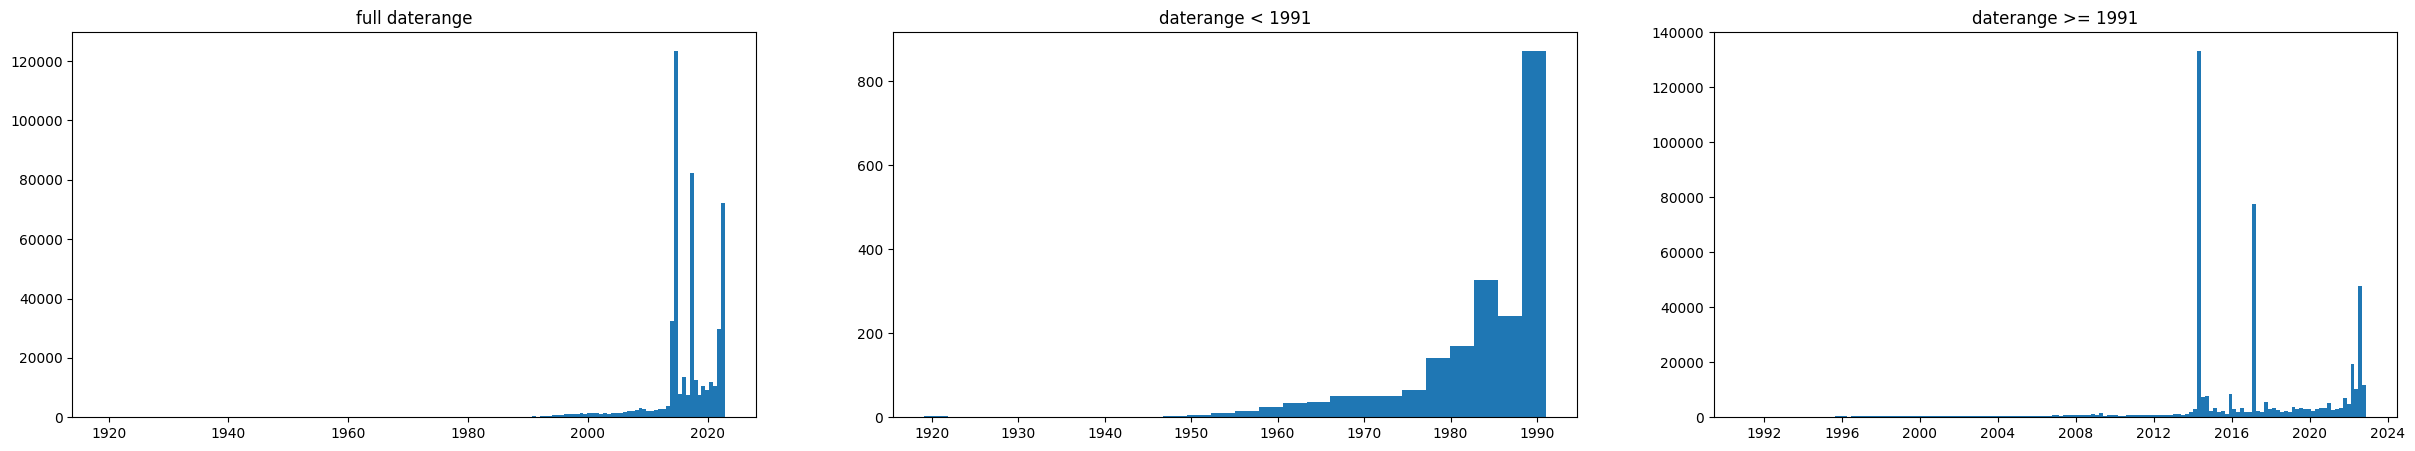

In [69]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 5))

ax1.hist(mid_df['date'], bins='rice')
ax1.set_title('full daterange')

ax2.hist(mid_df[mid_df['date']<'1991']['date'], bins='rice')
ax2.set_title('daterange < 1991')

ax3.hist(mid_df[mid_df['date']>='1991']['date'], bins='rice')
ax3.set_title('daterange >= 1991');

plt.show()

Ukraine declared its independence on **August 24th, 1991**. Therefore, all records before that date should be excluded.

In [70]:
# Excluding Ukrainian SSR records from DataFrame
mid_df = mid_df[mid_df['date'] >= '1991-08-24'].sort_values(by='date').reset_index(drop=True)
mid_df.head(1)

,weaponkind,report,date,region,weaponcategory
0,Револьвер,Theft,1991-08-26,Lviv,Handguns


#### date - crimean data

Historical info:
>* Russia invaded Crimea on **February 27, 2014**. 
>* On **March 24, 2014**, the Ukrainian government ordered the full withdrawal of its armed forces from Crimea, de facto losing control over all MIA records of registered weapons in the region. 
>* Based on the previous statement, all registered weapons on the Crimean peninsula are probably treated as lost or stolen. Moreover, another assumption can be made that data may have been uploaded in bulk, thus introducing some extreme outliers seen on the histograms further above.

In [71]:
# Filtered DataFrame
crimea = mid_df[
    (mid_df['region']=='Simferopol')&
    (mid_df['date']>='2014')]

In [72]:
crimea.groupby([pd.Grouper(key='date', freq='Y'), 'report']).size().reset_index()

,date,report,0
0,2014-12-31,Loss,93048
1,2014-12-31,Theft,26426
2,2015-12-31,Loss,0
3,2015-12-31,Theft,0
4,2016-12-31,Loss,0
5,2016-12-31,Theft,0
6,2017-12-31,Loss,0
7,2017-12-31,Theft,47


In [73]:
crimea.groupby([pd.Grouper(key='date', freq='M'), 'report']).size().reset_index().head(10)

,date,report,0
0,2014-01-31,Loss,9
1,2014-01-31,Theft,9
2,2014-02-28,Loss,3
3,2014-02-28,Theft,5
4,2014-03-31,Loss,2489
5,2014-03-31,Theft,18489
6,2014-04-30,Loss,0
7,2014-04-30,Theft,789
8,2014-05-31,Loss,90547
9,2014-05-31,Theft,7134


In [74]:
# Grouped days, after 2014-02-27, where record counts are > 0
crimea = crimea.groupby([pd.Grouper(key='date', freq='D'), 'report']).size().reset_index()
crimea[
    (crimea['date']>='2014-03-01')&
    (crimea.iloc[:,-1]!=0)
].head(20)

,date,report,0
123,2014-03-03,Theft,1
128,2014-03-06,Loss,1
132,2014-03-08,Loss,1
138,2014-03-11,Loss,1
176,2014-03-30,Loss,1
178,2014-03-31,Loss,2485
179,2014-03-31,Theft,18488
181,2014-04-01,Theft,789
300,2014-05-31,Loss,90547
301,2014-05-31,Theft,7134


While presence of records for **2014** can by justified by the fact that 'registered weapons' data was still updating, records for **2017** (3 years after annexation) seem odd. 

In [75]:
# Filtered DataFrame with raw records
crimea = pre_df[pre_df['organunit'].str.contains(regx_acenters['Simferopol'])].copy()
crimea['theftdate'] = pd.to_datetime(crimea['theftdate'],utc=True)
crimea['insertdate'] = pd.to_datetime(crimea['insertdate'],utc=True)

In [76]:
crimea = crimea[
    (crimea['theftdate']>'2014')|
    (crimea['insertdate']>'2014')
].sort_values(['theftdate','insertdate'])
crimea.nlargest(10,'theftdate')

,weaponnumber,weaponkind,organunit,reasonsearch,insertdate,theftdate
383164,3089,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-21 00:00:00+00:00,2017-05-11 00:00:00+00:00
383165,3297,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-21 00:00:00+00:00,2017-05-11 00:00:00+00:00
384732,2309,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-21 00:00:00+00:00,2017-05-11 00:00:00+00:00
385539,3087,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-21 00:00:00+00:00,2017-05-11 00:00:00+00:00
381770,3051,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-22 00:00:00+00:00,2017-05-11 00:00:00+00:00
381772,0033,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-22 00:00:00+00:00,2017-05-11 00:00:00+00:00
381773,4582,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-22 00:00:00+00:00,2017-05-11 00:00:00+00:00
381774,3130,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-22 00:00:00+00:00,2017-05-11 00:00:00+00:00
381775,4827,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-22 00:00:00+00:00,2017-05-11 00:00:00+00:00
381776,4957,ПІСТОЛЕТ,ГОЛОВНЕ УПРАВЛІННЯ НАЦІОНАЛЬНОЇ ПОЛІЦІЇ В АВТОНОМНІЙ РЕСПУБЛІЦІ КРИМ ТА М. СЕВАСТОПОЛІ,ВИКРАДЕННЯ,2020-12-22 00:00:00+00:00,2017-05-11 00:00:00+00:00


It appears that **2017** records may have been a part of another update.<br>Therefore, since 'date' values after **March 24, 2014** are merely indicators of when the updates occured, all 'update' dates can be replaced with **March 24, 2014**.

In [77]:
del crimea

In [78]:
# Storing 'argwhere' arrays in a variable
cond_args = np.argwhere([(mid_df.loc[:,'region']=='Simferopol') & (mid_df.loc[:,'date']>='2014-03-25')])
cond_args[0][1]

58855

In [79]:
mid_df.loc[cond_args[0][1], 'date']

Timestamp('2014-03-30 00:00:00')

In [80]:
# Overwriting main dataframe values with '2014-03-24', using 'cond_args' indexes
for _, index in cond_args:
    mid_df.loc[index, 'date'] = pd.to_datetime('2014-03-24')

In [81]:
mid_df.loc[cond_args[0][1], 'date']

Timestamp('2014-03-24 00:00:00')

In [82]:
mid_df[mid_df['region']=='Simferopol'].groupby([pd.Grouper(key='date', freq='D'), 'report']).size().reset_index().tail()

,date,report,0
16487,2014-03-22,Theft,0
16488,2014-03-23,Loss,0
16489,2014-03-23,Theft,0
16490,2014-03-24,Loss,93033
16491,2014-03-24,Theft,26458


In [83]:
mid_df.head(1)

,weaponkind,report,date,region,weaponcategory
0,Револьвер,Theft,1991-08-26,Lviv,Handguns


***
### Making final changes

In [84]:
# Rearranging and sorting columns
end_df = mid_df.loc[:,['date','region', 'report', 'weaponcategory']].sort_values(by=['date','region']).reset_index(drop=True).copy()

In [85]:
end_df.head()

,date,region,report,weaponcategory
0,1991-08-26,Lviv,Theft,Handguns
1,1991-08-27,Kyiv,Loss,Light firearms
2,1991-08-27,Simferopol,Theft,Light firearms
3,1991-08-27,Simferopol,Theft,Light firearms
4,1991-08-27,Simferopol,Theft,Pneumatic&Flobert


In [86]:
end_df.info(show_counts=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485097 entries, 0 to 485096
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            485097 non-null  datetime64[ns]
 1   region          485097 non-null  category      
 2   report          485097 non-null  category      
 3   weaponcategory  485097 non-null  category      
dtypes: category(3), datetime64[ns](1)
memory usage: 5.1 MB


## Export

### .csv

In [87]:
#(optional .csv export)
#end_df.to_csv('data/ua-mia-weapons.csv', index=False)

### .parquet 

In [88]:
#(optional parquet export)
#end_df.to_parquet('data/ua-mia-weapons.parquet.gzip', engine='pyarrow', compression='gzip', index=False)